<a href="https://colab.research.google.com/github/tanya58/Grammar-error/blob/main/GRAMMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gra/Grammar Correction.csv')
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [ ]:
display(df.describe())

,Serial Number
count,2018.000000
mean,1009.500000
std,582.690741
min,1.000000
25%,505.250000
50%,1009.500000
75%,1513.750000
max,2018.000000


In [ ]:
df.isna().sum()

,0
Serial Number,0
Error Type,0
Ungrammatical Statement,0
Standard English,0


In [ ]:
print(df.shape)

(2018, 4)


DATA CLEANING


In [ ]:
df_clean = df.drop_duplicates()
print(f'Shape of df_clean= {df_clean.shape}')

Shape of df_clean= (2018, 4)


In [ ]:
# remove leading/trailing spaces etc
df_clean['Ungrammatical Statement'] = df_clean['Ungrammatical Statement'].str.strip()
df_clean['Standard English'] = df_clean['Standard English'].str.strip()

In [ ]:
# Strip unwanted characters like numbers at the start of sentences if they are not part of the error
df_clean['Ungrammatical Statement'] = df_clean['Ungrammatical Statement'].str.replace(r'^\d+\.\s+', '', regex=True)
df_clean['Standard English'] = df_clean['Standard English'].str.replace(r'^\d+\.\s+', '', regex=True)


In [ ]:
print(f'Shape of df_clean= {df_clean.shape}')


Shape of df_clean= (2018, 4)


Exploratory Data Analysis

In [ ]:
# Count the frequency of each type of grammatical error
error_counts = df_clean['Error Type'].value_counts()
error_counts

,count
Error Type,
Sentence Structure Errors,103
Verb Tense Errors,100
Article Usage,100
Subject-Verb Agreement,100
Spelling Mistakes,100
Preposition Usage,95
Punctuation Errors,60
Relative Clause Errors,51
Ambiguity,50


In [ ]:
# Analyze the length of sentences in the 'Ungrammatical Statement' and 'Standard English' columns.
df_clean['Ungrammatical Length'] = df_clean['Ungrammatical Statement'].apply(len)
df_clean['Standard Length'] = df_clean['Standard English'].apply(len)

In [ ]:
df_clean.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26


Visualization of the distribution of error types

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

Text(0, 0.5, 'Error Type')

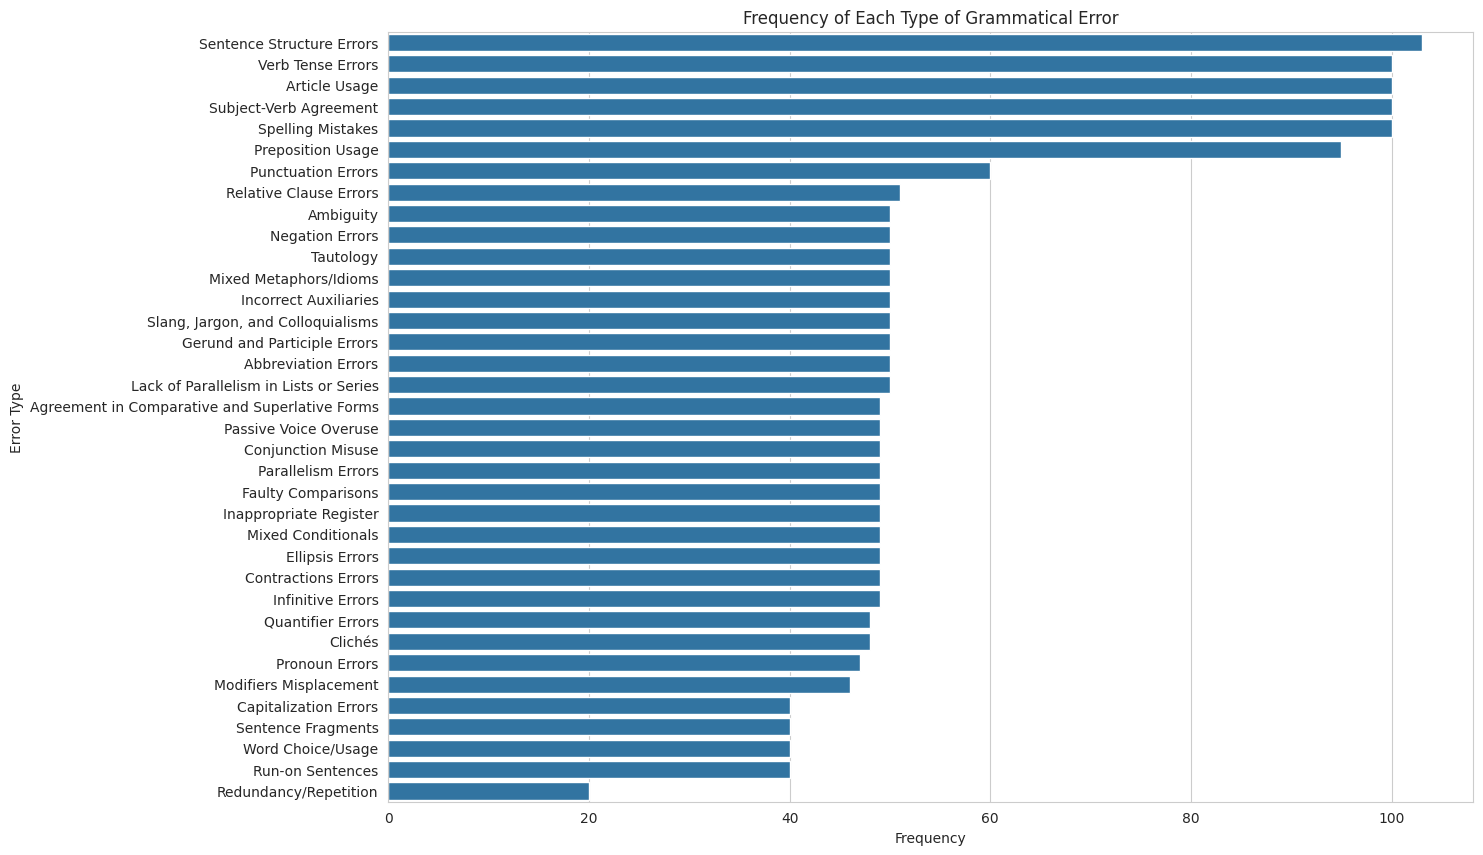

In [ ]:
# Visualization of the distribution of error types
plt.figure(figsize=(14, 10))
error_type_plot = sns.countplot(y=df_clean['Error Type'], order=df_clean['Error Type'].value_counts().index)
error_type_plot.set_title('Frequency of Each Type of Grammatical Error')
error_type_plot.set_xlabel('Frequency')
error_type_plot.set_ylabel('Error Type')

Visualization of the sentence lengths in both columns

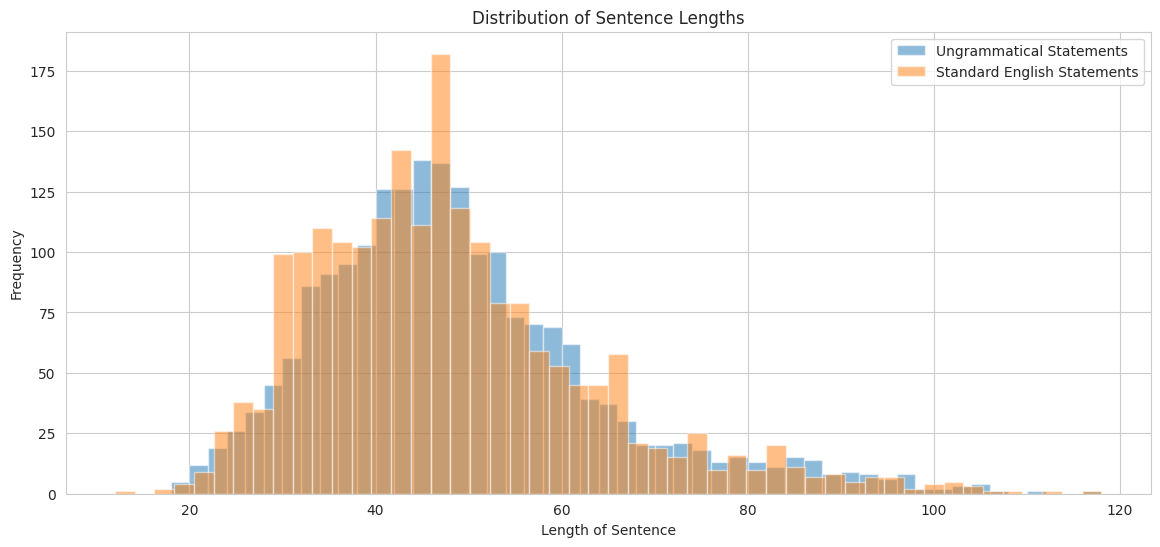

In [ ]:
# Visualization of the sentence lengths in both columns
plt.figure(figsize=(14, 6))
plt.hist(df_clean['Ungrammatical Length'], bins=50, alpha=0.5, label='Ungrammatical Statements')
plt.hist(df_clean['Standard Length'], bins=50, alpha=0.5, label='Standard English Statements')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.show()

Word Frequency Analysis

In [ ]:
!pip install nltk
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt_tab')
nltk.download('punkt')
from collections import Counter
from nltk.tokenize import word_tokenize


# Function to calculate word frequency
def word_frequency(sentences):
    words = []
    for sentence in sentences:
        words.extend(word_tokenize(sentence.lower()))
    return Counter(words)

# Calculate word frequency for both ungrammatical and corrected statements
ungrammatical_freq = word_frequency(df_clean['Ungrammatical Statement'])
corrected_freq = word_frequency(df_clean['Standard English'])

# Get the top 20 most frequent words in each category
top_ungrammatical = ungrammatical_freq.most_common(20)
top_corrected = corrected_freq.most_common(20)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


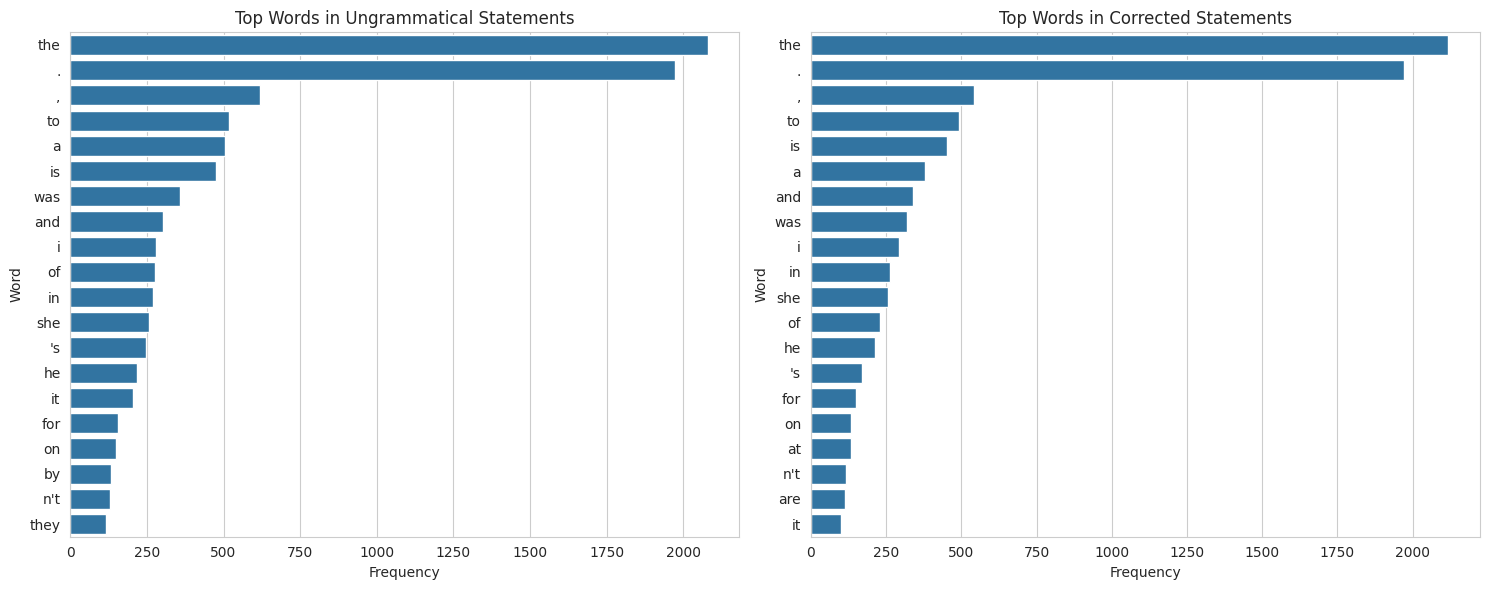

Top Words in Ungrammatical Statements:
    Word  Frequency
0    the       2079
1      .       1973
2      ,        619
3     to        518
4      a        504
5     is        475
6    was        357
7    and        304
8      i        279
9     of        277
10    in        270
11   she        258
12    's        246
13    he        217
14    it        204
15   for        155
16    on        148
17    by        132
18   n't        131
19  they        118

Top Words in Corrected Statements:
   Word  Frequency
0   the       2118
1     .       1972
2     ,        542
3    to        493
4    is        453
5     a        379
6   and        341
7   was        321
8     i        293
9    in        263
10  she        256
11   of        230
12   he        214
13   's        170
14  for        151
15   on        134
16   at        133
17  n't        117
18  are        112
19   it        101


In [ ]:
top_ungrammatical_df = pd.DataFrame(top_ungrammatical, columns=['Word', 'Frequency'])
top_corrected_df = pd.DataFrame(top_corrected, columns=['Word', 'Frequency'])

# Bar Graphs
plt.figure(figsize=(15, 6))

# Ungrammatical Statements
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=top_ungrammatical_df)
plt.title('Top Words in Ungrammatical Statements')

# Corrected Statements
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=top_corrected_df)
plt.title('Top Words in Corrected Statements')

plt.tight_layout()
plt.show()

# Displaying in Table Format
print("Top Words in Ungrammatical Statements:")
print(top_ungrammatical_df)

print("\nTop Words in Corrected Statements:")
print(top_corrected_df)

In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download the necessary resource
nltk.download('averaged_perceptron_tagger_eng')

from nltk import pos_tag

# Function to perform POS tagging
def pos_tag_sentences(sentences):
    tagged_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged = pos_tag(tokens)
        tagged_sentences.extend(tagged)
    return tagged_sentences

# POS tagging for ungrammatical and corrected sentences
tagged_ungrammatical = pos_tag_sentences(df_clean['Ungrammatical Statement'])
tagged_corrected = pos_tag_sentences(df_clean['Standard English'])

# Count the frequency of each POS tag
ungrammatical_pos_counts = pd.Series([tag for _, tag in tagged_ungrammatical]).value_counts()
corrected_pos_counts = pd.Series([tag for _, tag in tagged_corrected]).value_counts()

# Display or visualize the results
print(ungrammatical_pos_counts)
print(corrected_pos_counts)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


NN      3828
DT      2877
.       2021
IN      1578
PRP     1307
JJ      1158
VBZ      972
NNS      938
VBD      868
VB       736
,        619
RB       588
TO       526
VBG      474
VBP      466
VBN      429
CC       422
PRP$     284
MD       227
NNP      209
CD       101
POS      101
RBR       79
JJR       70
:         53
WRB       52
RBS       47
RP        34
JJS       31
''        19
WDT       17
WP        15
EX        15
PDT        5
``         3
(          1
)          1
NNPS       1
Name: count, dtype: int64
NN      3666
DT      2769
.       2023
IN      1523
PRP     1162
JJ      1093
VBD      948
NNS      917
VBZ      878
VB       658
RB       550
,        542
VBG      525
TO       493
CC       432
VBP      412
VBN      385
PRP$     380
NNP      287
MD       200
CD       100
POS       80
JJR       61
WRB       59
RBR       57
JJS       44
:         35
RP        30
WP        27
WDT       22
EX        17
PDT       17
''         5
``         5
NNPS       5
(          3
)          3

<Figure size 2000x1000 with 0 Axes>

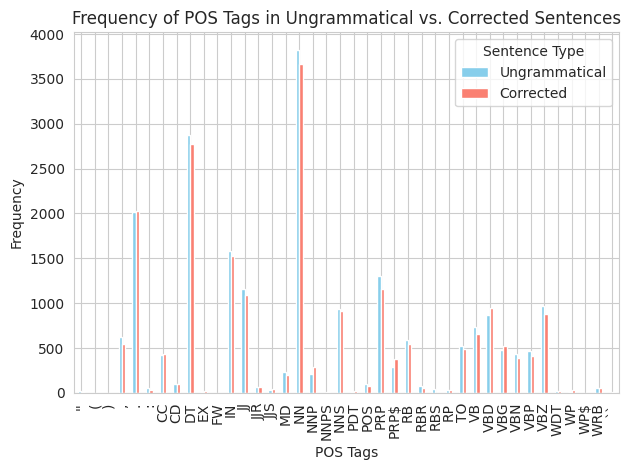

In [ ]:
# Convert to DataFrame for visualization
pos_df = pd.DataFrame({
    'Ungrammatical': ungrammatical_pos_counts,
    'Corrected': corrected_pos_counts
}).fillna(0)

# Plot
plt.figure(figsize=(20, 10))  # Adjust the size as necessary
pos_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Frequency of POS Tags in Ungrammatical vs. Corrected Sentences')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the labels vertically
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

In [ ]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.7 MB/s eta 0:00:00


In [ ]:
import textstat

# Compute the readability scores for ungrammatical sentences
ungrammatical_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_clean['Ungrammatical Statement']]

# Compute the readability scores for corrected sentences
corrected_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_clean['Standard English']]

# Now, you could calculate the average score for each or compare scores sentence by sentence
avg_ungrammatical_score = sum(ungrammatical_readability) / len(ungrammatical_readability)
avg_corrected_score = sum(corrected_readability) / len(corrected_readability)

# Output the average Flesch Reading Ease scores
print(f'Average Readability Score for Ungrammatical Sentences: {avg_ungrammatical_score}')
print(f'Average Readability Score for Corrected Sentences: {avg_corrected_score}')

Average Readability Score for Ungrammatical Sentences: 82.42183845391477
Average Readability Score for Corrected Sentences: 80.11340931615477


In [ ]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from Levenshtein import distance as levenshtein_distance

# Assuming `ungrammatical_sentences` and `corrected_sentences` are lists of sentences
difficulty_index = []

for ungrammatical, corrected in zip(df_clean['Ungrammatical Statement'], df_clean['Standard English']):
    # Calculate the Levenshtein distance between each pair of sentences
    edit_distance = levenshtein_distance(ungrammatical, corrected)
    # Normalize by the length of the original (ungrammatical) sentence
    normalized_difficulty = edit_distance / max(len(ungrammatical), len(corrected))
    difficulty_index.append(normalized_difficulty)

# Convert to a numpy array for easier analysis
difficulty_index = np.array(difficulty_index)

# Define difficulty levels based on the index
# For example, sentences could be classified into 'Easy', 'Medium', or 'Hard' correction difficulty
difficulty_levels = ['Easy' if x < 0.2 else 'Medium' if x < 0.5 else 'Hard' for x in difficulty_index]

# Now you can count how many sentences fall into each difficulty level
difficulty_counts = Counter(difficulty_levels)

difficulty_counts

Counter({'Easy': 1546, 'Medium': 371, 'Hard': 101})

N-gram Analysis

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter

tokens = [nltk.word_tokenize(sentence.lower()) for sentence in df_clean['Ungrammatical Statement']]

# Generate bi-grams and tri-grams
bi_grams = [gram for sentence in tokens for gram in bigrams(sentence)]
tri_grams = [gram for sentence in tokens for gram in trigrams(sentence)]

# Count the frequency of each bi-gram and tri-gram
bi_gram_freq = Counter(bi_grams)
tri_gram_freq = Counter(tri_grams)

# Get the most common bi-grams and tri-grams
most_common_bi = bi_gram_freq.most_common(10)
most_common_tri = tri_gram_freq.most_common(10)

most_common_bi, most_common_tri

([(('in', 'the'), 142),
  ((',', 'and'), 142),
  ((',', 'but'), 100),
  (('to', 'the'), 87),
  (('of', 'the'), 82),
  (('by', 'the'), 79),
  (('it', "'s"), 75),
  (('at', 'the'), 60),
  (('on', 'the'), 53),
  (('the', 'store'), 45)],
 [((',', 'and', 'to'), 43),
  ((',', 'but', 'it'), 32),
  ((',', 'and', 'it'), 23),
  (('went', 'to', 'the'), 20),
  (('the', 'movie', 'was'), 19),
  ((',', 'it', "'s"), 19),
  (('to', 'the', 'store'), 18),
  (('but', 'it', 'is'), 18),
  (('the', 'group', 'of'), 15),
  (('is', 'the', 'most'), 15)])

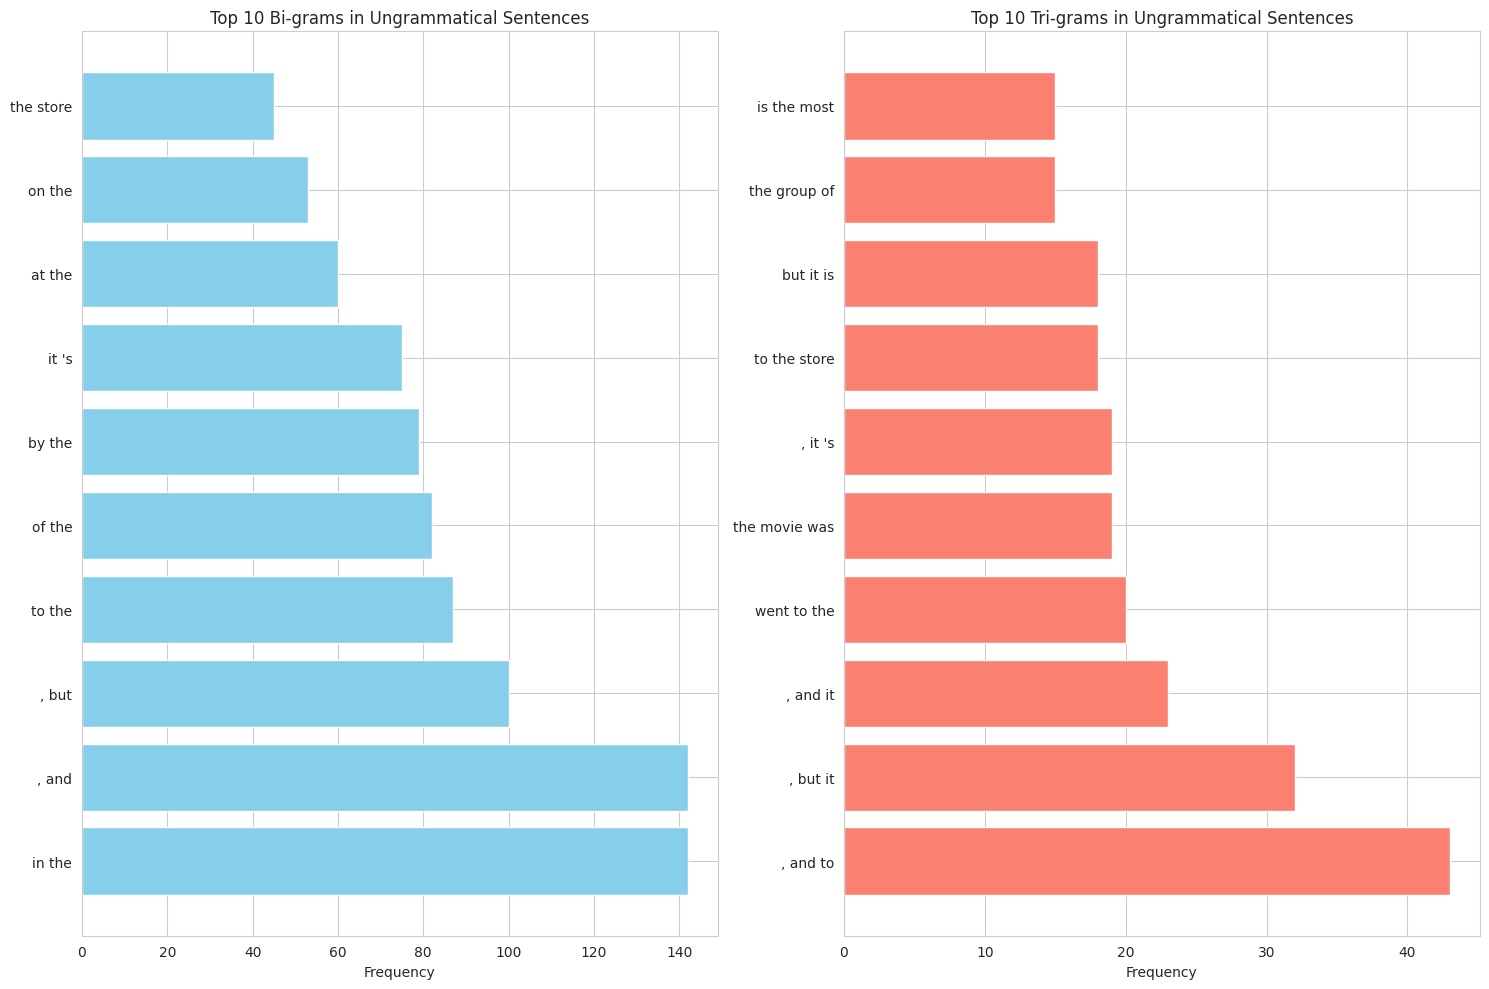

In [ ]:
bi_grams, bi_freq = zip(*most_common_bi)
tri_grams, tri_freq = zip(*most_common_tri)

# Convert N-gram tuples to strings
bi_grams_str = [' '.join(gram) for gram in bi_grams]
tri_grams_str = [' '.join(gram) for gram in tri_grams]

plt.figure(figsize=(15, 10))

# Plotting bi-grams
plt.subplot(1, 2, 1)
plt.barh(bi_grams_str, bi_freq, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bi-grams in Ungrammatical Sentences')

# Plotting tri-grams
plt.subplot(1, 2, 2)
plt.barh(tri_grams_str, tri_freq, color='salmon')
plt.xlabel('Frequency')
plt.title('Top 10 Tri-grams in Ungrammatical Sentences')

plt.tight_layout()
plt.show()

Sentiment Analysis

In [ ]:
from textblob import TextBlob

ungrammatical_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_clean['Ungrammatical Statement']]
corrected_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_clean['Standard English']]

# Calculate average sentiment, compare individual sentence sentiment.
avg_ug_sentiment = sum(ungrammatical_sentiments) / len(ungrammatical_sentiments)
avg_corr_sentiment = sum(corrected_sentiments) / len(corrected_sentiments)

print(f'Average Sentiment for Ungrammatical Sentences: {avg_ug_sentiment}')
print(f'Average Sentiment for Corrected Sentences: {avg_corr_sentiment}')

Average Sentiment for Ungrammatical Sentences: 0.0987968938340592
Average Sentiment for Corrected Sentences: 0.0898120780634406


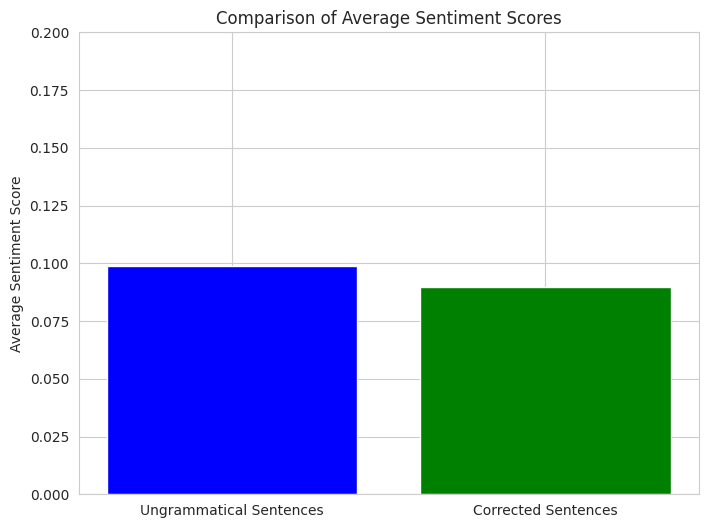

In [ ]:
# Sentiment scores
scores = [avg_ug_sentiment, avg_corr_sentiment]
labels = ['Ungrammatical Sentences', 'Corrected Sentences']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Scores')
plt.ylim(0, 0.2)
plt.show()

Most Common Grammatical Corrections

In [ ]:
from nltk import word_tokenize

nltk.download('punkt')

def align_and_find_changes(sentence1, sentence2):
    tokens1 = word_tokenize(sentence1)
    tokens2 = word_tokenize(sentence2)
    max_len = max(len(tokens1), len(tokens2))
    aligned_tokens1 = tokens1 + [''] * (max_len - len(tokens1))
    aligned_tokens2 = tokens2 + [''] * (max_len - len(tokens2))

    changes = []
    for token1, token2 in zip(aligned_tokens1, aligned_tokens2):
        if token1 != token2:
            changes.append((token1, token2))
    return changes

# Apply the function to each pair of sentences
df_clean['Changes'] = df_clean.apply(lambda row: align_and_find_changes(row['Ungrammatical Statement'], row['Standard English']), axis=1)

# View the DataFrame with identified changes
df_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Changes
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]"
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]"
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]"
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]"
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]"


In [ ]:
from collections import Counter

# Flatten the list of changes and count the occurrences
all_changes = [change for changes in df_clean['Changes'] for change in changes]
change_counter = Counter(all_changes)

# Display the most common changes
most_common_changes = change_counter.most_common(20)
print("Most Common Changes:")
for change, frequency in most_common_changes:
    print(f"{change}: {frequency}")

Most Common Changes:
('.', ''): 661
('', '.'): 351
('a', 'the'): 63
(',', '.'): 56
(',', 'and'): 46
('was', 'were'): 41
('the', '.'): 41
('but', ''): 41
('the', ''): 40
('it', 'its'): 38
('no', 'any'): 34
('is', ''): 31
('...', ','): 28
('in', 'the'): 25
('it', '.'): 24
(',', 'was'): 22
('the', 'in'): 21
('a', ''): 20
('of', 'the'): 19
('they', 'their'): 19


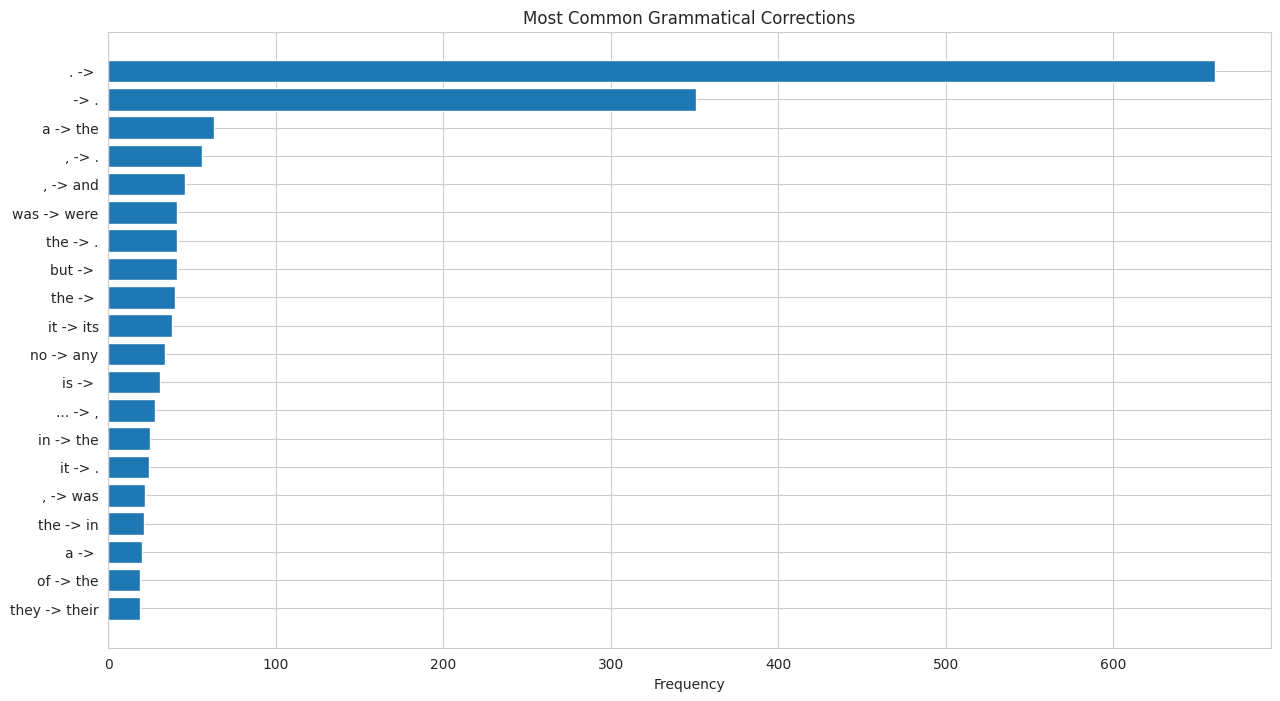

In [ ]:
changes, frequencies = zip(*most_common_changes)

# Convert change tuples to string format for labeling
change_labels = [f'{original} -> {corrected}' for original, corrected in changes]


plt.figure(figsize=(15, 8))
plt.barh(change_labels, frequencies)
plt.xlabel('Frequency')
plt.title('Most Common Grammatical Corrections')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()

In [ ]:
def categorize_change(change):
    original, corrected = change
    if original == '':
        return 'Insertion'
    elif corrected == '':
        return 'Deletion'
    else:
        return 'Substitution'

df_clean['Change Types'] = df_clean['Changes'].apply(lambda changes: [categorize_change(change) for change in changes])
df_clean.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Changes,Change Types
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]",[Substitution]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]",[Substitution]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]",[Substitution]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]",[Substitution]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]",[Substitution]


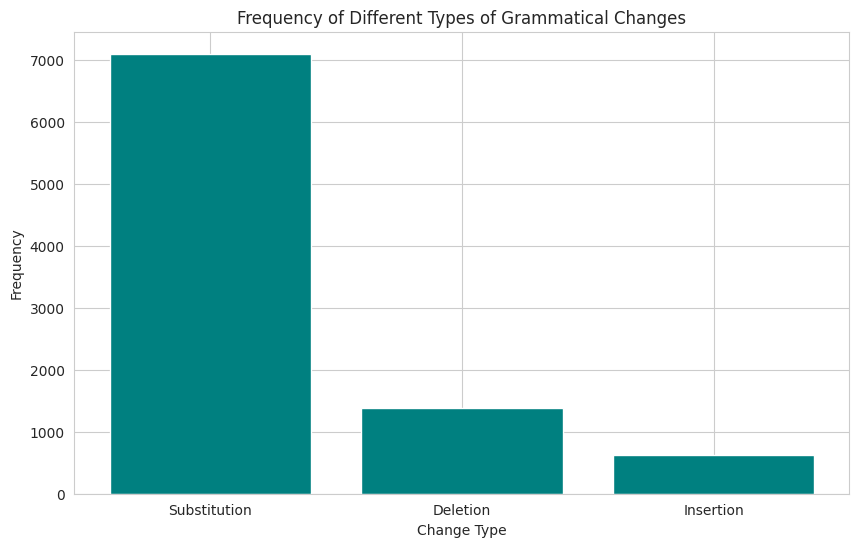

In [ ]:
from collections import Counter

change_type_counter = Counter([change_type for change_types in df_clean['Change Types'] for change_type in change_types])

change_types, frequencies = zip(*change_type_counter.items())

plt.figure(figsize=(10, 6))
plt.bar(change_types, frequencies, color='teal')
plt.xlabel('Change Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Grammatical Changes')
plt.show()

Contextual Analysis

In [ ]:
context_window = 2  # Number of words to consider before and after the change

def extract_context(sentence, index, window):
    words = nltk.word_tokenize(sentence)
    start = max(0, index - window)
    end = min(len(words), index + window + 1)
    return ' '.join(words[start:end])

df_clean['Contexts'] = df_clean.apply(lambda row: [extract_context(row['Ungrammatical Statement'], i, context_window) for i, _ in enumerate(nltk.word_tokenize(row['Ungrammatical Statement'])) if (row['Ungrammatical Statement'][i], row['Standard English'][i]) in row['Changes']], axis=1)
df_clean.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Changes,Change Types,Contexts
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]",[Substitution],[]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]",[Substitution],[]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]",[Substitution],[]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]",[Substitution],[]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]",[Substitution],[]


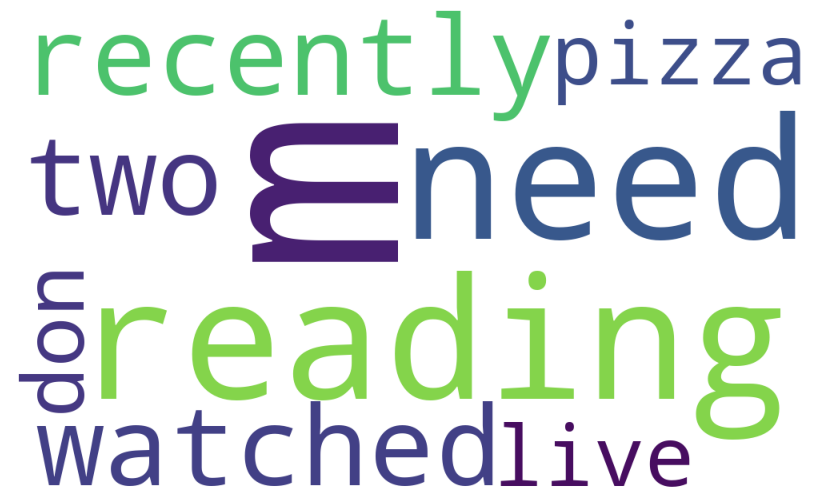

In [ ]:
from wordcloud import WordCloud

# Flatten the list of contexts
all_contexts = [context for contexts in df_clean['Contexts'] for context in contexts]

# Join all contexts into a single string
all_contexts_string = ' '.join(all_contexts)

# Create a word cloud
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='white',
                min_font_size = 10).generate(all_contexts_string)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
# load those needed packages and libraries
import torch
import optuna
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from nltk.translate.bleu_score import sentence_bleu
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import SmoothingFunction
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
# load the pre-trained T5 model and tokenizer from the Hugging Face Transformers library and set the shared parameters (as freezing those parameters defined during the pre-trained stage to avoid catastrophic forgetting) to False
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# set the shared parameters to False
for param in model.shared.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
# define the GrammarCorrectionDataset class for the dataset
class GrammarCorrectionDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    # return the ungrammatical statement and the standard English statement
    def __getitem__(self, idx):
        ungrammatical_statement = self.dataframe.iloc[idx]["Ungrammatical Statement"]
        standard_english = self.dataframe.iloc[idx]["Standard English"]
        return ungrammatical_statement, standard_english

In [ ]:
# split the dataset into training, validation, and test sets with 80%, 10%, and 10%
train_df, test_df = train_test_split(df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.1)

# create the GrammarCorrectionDataset for the training, validation, and test sets
train_dataset = GrammarCorrectionDataset(train_df)
val_dataset = GrammarCorrectionDataset(val_df)
test_dataset = GrammarCorrectionDataset(test_df)

In [ ]:
# set the device to cuda if available else cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# create the DataLoaders for the training, validation, and test sets
model = model.to(device)
# set the model to training mode
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
# initialize the scheduler
scheduler = StepLR(optimizer, step_size = 1, gamma = 0.1)

In [ ]:
# define the train_epoch function to train the model for one epoch
def train_epoch(model, dataloader, optimizer, device, scheduler):
    # set the model to the device
    model = model.to(device)
    # set the model to training mode
    model.train()
    # initialize the total loss to 0
    total_loss = 0
    # iterate over the dataloader to get the ungrammatical statement and the standard English statement
    for ungrammatical_statement, standard_english in dataloader:
        # move the inputs and labels to the device, set the configuration for the tokenizer, and get the outputs from the model
        inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding = True, truncation=True, max_length = 256).to(device)
        labels = tokenizer(standard_english, return_tensors = "pt", padding = True, truncation = True, max_length = 256).input_ids.to(device)
        outputs = model(**inputs, labels = labels)
        # get the loss from the outputs and add it to the total loss
        loss = outputs.loss
        total_loss += loss.item()
        # backpropagate the loss and update the optimizer
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # update the scheduler
    scheduler.step()
    # calculate the average loss
    average_loss = total_loss / len(dataloader)
    return average_loss

In [ ]:
# define the eval_model function to evaluate the model on the validation or test set
def eval_model(model, dataloader, device):
    # set the model to the device
    model = model.to(device)
    # set the model to evaluation mode
    model.eval()
    # initialize the total BLEU score to 0
    total_bleu_score = 0
    # set the smoothing function to method1
    smoothing = SmoothingFunction().method1
    with torch.no_grad():
        # iterate over the dataloader to get the ungrammatical statement and the standard English statement
        for ungrammatical_statement, standard_english in dataloader:
            # move the inputs and labels to the device, set the configuration for the tokenizer, and get the outputs from the model
            inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding = True, truncation = True, max_length = 256).to(device)
            labels = tokenizer(standard_english, return_tensors = "pt", padding = True, truncation = True, max_length = 256).input_ids.to(device)
            outputs = model.generate(**inputs, max_new_tokens = 256)
            # decode the outputs and calculate the BLEU score
            corrected_english = tokenizer.decode(outputs[0], skip_special_tokens = True)
            reference = [standard_english[0].split()]
            candidate = corrected_english.split()
            bleu_score = sentence_bleu(reference, candidate, smoothing_function = smoothing)
            total_bleu_score += bleu_score
    average_bleu_score = total_bleu_score / len(dataloader)
    print(average_bleu_score)
    return average_bleu_score

In [ ]:
# using optuna to tune the hyperparameters of the model and optimizer to improve the BLEU score on the validation set with 10 trials
def objective(trial):
    # define the hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
    batch_size = trial.suggest_categorical("batch_size", [4, 8, 16, 32])

    # load the pre-trained T5 model and tokenizer from the Hugging Face Transformers library
    tokenizer = T5Tokenizer.from_pretrained("t5-base")
    model = T5ForConditionalGeneration.from_pretrained("t5-base")
    # set the shared parameters to False
    for param in model.shared.parameters():
        param.requires_grad = False

    # set the optimizer and scheduler
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    scheduler = StepLR(optimizer, step_size = 1, gamma = 0.1)

    # create the DataLoaders for the training and validation
    train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
    val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
    test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

    # train the model for the specified number of epochs
    for epoch in range(num_train_epochs):
        # train the model for one epoch and print the average loss
        average_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler)
        print(f"Epoch: {epoch+1}, Loss: {average_loss}")
        eval_model(model, val_dataloader, device)

    # evaluate the model with the validation set and return the average BLEU score
    average_bleu_score = eval_model(model, test_dataloader, device)
    return average_bleu_score

# create a study and optimize the objective function with 5 trials
study = optuna.create_study(direction = "maximize", pruner = optuna.pruners.MedianPruner())
study.optimize(objective, n_trials = 5)
# print the best hyperparameters
print(study.best_params)

[I 2025-01-01 11:02:03,227] A new study created in memory with name: no-name-2baaee16-d331-431c-bc75-b3cee1268076
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch: 1, Loss: 2.2861785307403437
0.45260742105077495
Epoch: 2, Loss: 0.9119554256440523
0.451119745191512
Epoch: 3, Loss: 0.8568384716743936
0.47799465894287824
Epoch: 4, Loss: 0.8122534881610187
0.5147211227324442
Epoch: 5, Loss: 0.8289157046266824
0.3883660581574905


[I 2025-01-01 11:11:35,488] Trial 0 finished with value: 0.5055648489556639 and parameters: {'learning_rate': 5.626065000486426e-06, 'num_train_epochs': 5, 'batch_size': 4}. Best is trial 0 with value: 0.5055648489556639.


0.5055648489556639
Epoch: 1, Loss: 2.0140416330617406
0.5601387184922607
Epoch: 2, Loss: 0.4318762913994167
0.6743029309942409
Epoch: 3, Loss: 0.418017165168472
0.6830715618914432


[I 2025-01-01 11:13:09,284] Trial 1 finished with value: 0.5359524353264722 and parameters: {'learning_rate': 4.960936904380569e-05, 'num_train_epochs': 3, 'batch_size': 32}. Best is trial 1 with value: 0.5359524353264722.


0.5359524353264722
Epoch: 1, Loss: 4.759407984031426
0.5217949239470067


[I 2025-01-01 11:14:32,646] Trial 2 finished with value: 0.2980669340621303 and parameters: {'learning_rate': 4.894215974671026e-06, 'num_train_epochs': 1, 'batch_size': 16}. Best is trial 1 with value: 0.5359524353264722.


0.2980669340621303
Epoch: 1, Loss: 6.482127915257993
0.4009414183410854
Epoch: 2, Loss: 6.124866371569426
0.5218480392991961


[I 2025-01-01 11:15:39,284] Trial 3 finished with value: 0.4020432887175111 and parameters: {'learning_rate': 1.1291943217038486e-06, 'num_train_epochs': 2, 'batch_size': 32}. Best is trial 1 with value: 0.5359524353264722.


0.4020432887175111
Epoch: 1, Loss: 3.9342555488858904
0.32305255021674284
Epoch: 2, Loss: 1.9508972652665861
0.40949883040242524
Epoch: 3, Loss: 1.8066905435625014
0.3609802969733668
Epoch: 4, Loss: 1.7764155563417372
0.2347993868662359
Epoch: 5, Loss: 1.7856361865997314
0.4114916632090978


[I 2025-01-01 11:19:44,617] Trial 4 finished with value: 0.4195508037532332 and parameters: {'learning_rate': 8.766517001235114e-06, 'num_train_epochs': 5, 'batch_size': 16}. Best is trial 1 with value: 0.5359524353264722.


0.4195508037532332
{'learning_rate': 4.960936904380569e-05, 'num_train_epochs': 3, 'batch_size': 32}


In [ ]:
def calculate_avg_bleu_score(model, train_dataloader, val_dataloader, test_dataloader, device, num_train_epochs, learning_rate):
    # Load the tokenizer
    tokenizer = T5Tokenizer.from_pretrained("t5-base")

    # Move the model to the device
    model = model.to(device)

    # Set the optimizer and scheduler
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = StepLR(optimizer, step_size=1, gamma=0.1)

    # Train the model for the specified number of epochs
    for epoch in range(num_train_epochs):
        # Train the model for one epoch and print the average loss
        average_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler)
        print(f"Epoch: {epoch + 1}, Loss: {average_loss}")

        # Evaluate on the validation set
        eval_model(model, val_dataloader, device)

    # Evaluate the model with the test set and calculate the average BLEU score
    average_bleu_score = eval_model(model, test_dataloader, device)
    print(f"Average BLEU Score: {average_bleu_score}")
    return average_bleu_score


# Example Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
num_train_epochs = 3
learning_rate = 1e-4
batch_size = 16

# Create dataloaders (replace these with your actual datasets)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Load the model
model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Calculate BLEU score
avg_bleu_score = calculate_avg_bleu_score(model, train_dataloader, val_dataloader, test_dataloader, device, num_train_epochs, learning_rate)


Epoch: 1, Loss: 0.7759619181627756
0.6122777438891368
Epoch: 2, Loss: 0.19213338654774886
0.6746989690806505
Epoch: 3, Loss: 0.18181340101656024
0.8404243535520117
0.780868740304814
Average BLEU Score: 0.780868740304814


In [ ]:
# load the pre-trained T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# set the shared parameters to False
for param in model.shared.parameters():
    param.requires_grad = False

# set the device to cuda if available else cpu
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [ ]:
# get the best hyperparameters from the study
learning_rate = study.best_params["learning_rate"]
num_train_epochs = study.best_params["num_train_epochs"]
per_device_train_batch_size = study.best_params["batch_size"]

# set the optimizer and scheduler with the best hyperparameters
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
scheduler = StepLR(optimizer, step_size = 1, gamma = 0.1)

# create the DataLoaders for the training, validation, and test sets with the best hyperparameters (the batch size)
train_dataloader = DataLoader(train_dataset, batch_size = per_device_train_batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = per_device_train_batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = per_device_train_batch_size, shuffle = True)

# train the model for the specified number of epochs with the best hyperparameters and evaluate the model on the validation and test sets
for epoch in range(num_train_epochs):
    average_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler)
    print(f"Epoch: {epoch+1}, Loss: {average_loss}")
    eval_model(model, val_dataloader, device)

# evaluate the model on the test set with the best hyperparameters and print the average BLEU score
eval_model(model, test_dataloader, device)

Epoch: 1, Loss: 1.9991161143002303
0.5468651729865163
Epoch: 2, Loss: 0.41467761863832886
0.6355562246470178
Epoch: 3, Loss: 0.40354916323786194
0.8258227707818723
0.5183750052770285


0.5183750052770285

In [ ]:
# implement the fine-tuned model on the dataset to correct the ungrammatical statements
def correct_grammar(model, ungrammatical_statement):
    # set the model to evaluation
    model.eval()
    # tokenize the ungrammatical statement and get the outputs from the model
    inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding = True, truncation = True, max_length = 256).to(device)
    outputs = model.generate(**inputs, max_new_tokens = 256)
    # decode the outputs and return the corrected English statement
    corrected_english = tokenizer.decode(outputs[0], skip_special_tokens = True)
    return corrected_english

# correct the ungrammatical statements in the dataset
df["Corrected English"] = df["Ungrammatical Statement"].apply(lambda x: correct_grammar(model, x))

In [ ]:
df.head(20)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Corrected English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,The sun rises in the east.
5,6,Verb Tense Errors,I am eat pizza for lunch.,I am eating pizza for lunch.,I am eating pizza for lunch.
6,7,Verb Tense Errors,The students studies for the exam.,The students study for the exam.,The students study for the exam.
7,8,Verb Tense Errors,The car need to be repaired.,The car needs to be repaired.,The car needs to be repaired.
8,9,Verb Tense Errors,She will goes to the party tonight.,She will go to the party tonight.,She will go to the party tonight.
9,10,Verb Tense Errors,They watches the movie together.,They watch the movie together.,They watch the movie together.


In [ ]:
df.tail(20)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Corrected English
1998,1999,Lack of Parallelism in Lists or Series,"The store offers a wide range of products, com...","The store offers a wide range of products, com...","The store offers a wide range of products, com..."
1999,2000,Lack of Parallelism in Lists or Series,"The vacation package includes flights, accommo...","The vacation package includes flights, accommo...","The vacation package includes flights, accommo..."
2000,2001,Lack of Parallelism in Lists or Series,"The manager expects employees to be punctual, ...","The manager expects employees to be punctual, ...","The manager expects employees to be punctual, ..."
2001,2002,Lack of Parallelism in Lists or Series,"The strategy involves analyzing market trends,...","The strategy involves analyzing market trends,...","The strategy involves analyzing market trends,..."
2002,2003,Lack of Parallelism in Lists or Series,"The event will feature live music, delicious f...","The event will feature live music, delicious f...","The event will feature live music, delicious f..."
2003,2004,Lack of Parallelism in Lists or Series,The article discusses the importance of educat...,The article discusses the importance of educat...,The article discusses the importance of educat...
2004,2005,Lack of Parallelism in Lists or Series,"The exercise routine includes stretching, stre...","The exercise routine includes stretching, stre...","The exercise routine includes stretching, stre..."
2005,2006,Lack of Parallelism in Lists or Series,The government is committed to reducing povert...,The government is committed to reducing povert...,The government is committed to reducing povert...
2006,2007,Lack of Parallelism in Lists or Series,"The app allows users to track their expenses, ...","The app allows users to track their expenses, ...","The app allows users to track their expenses, ..."
2007,2008,Lack of Parallelism in Lists or Series,"The exhibition showcases contemporary art, pho...","The exhibition showcases contemporary art, pho...","The exhibition showcases contemporary art, pho..."


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model.save_pretrained("./t5_grammar_model")
tokenizer.save_pretrained("./t5_grammar_tokenizer")


('./t5_grammar_tokenizer/tokenizer_config.json',
 './t5_grammar_tokenizer/special_tokens_map.json',
 './t5_grammar_tokenizer/spiece.model',
 './t5_grammar_tokenizer/added_tokens.json')

In [ ]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Corrected English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,The sun rises in the east.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Define the F1 score evaluation function
def calculate_f1_score(model, dataloader, device):
    model = model.to(device)
    model.eval()

    tokenizer = T5Tokenizer.from_pretrained("t5-base")

    all_predictions = []
    all_references = []

    with torch.no_grad():
        for ungrammatical_statement, standard_english in dataloader:
            # Tokenize input sentences (ungrammatical statements)
            inputs = tokenizer(ungrammatical_statement, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

            # Tokenize reference sentences (corrected standard English)
            # The issue was here: labels should be decoded directly, not as input_ids
            references = [s for s in standard_english] # Directly use standard_english

            # Generate predictions from the model
            outputs = model.generate(**inputs, max_new_tokens=256)
            predictions = tokenizer.batch_decode(outputs, skip_special_tokens=True)

            # Append predictions and references for further comparison
            all_predictions.extend(predictions)
            all_references.extend(references)

    # Ensure predictions and references have the same length
    min_len = min(len(all_predictions), len(all_references))
    all_predictions = all_predictions[:min_len]
    all_references = all_references[:min_len]

    # Flatten the token lists to calculate precision, recall, and F1
    pred_tokens = [token for sentence in all_predictions for token in sentence.split()]
    ref_tokens = [token for sentence in all_references for token in sentence.split()]

    # Compute precision, recall, and F1 score at the token level
    precision = precision_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    recall = recall_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    f1 = f1_score(ref_tokens, pred_tokens, average="micro", zero_division=1)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return precision, recall, f1

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Define the F1 score evaluation function
def calculate_f1_score(model, dataloader, device):
    model = model.to(device)
    model.eval()

    tokenizer = T5Tokenizer.from_pretrained("t5-base")

    all_predictions = []
    all_references = []

    with torch.no_grad():
        for ungrammatical_statement, standard_english in dataloader:
            print(f"Processing batch...")  # Debugging: check if the loop is running

            # Tokenize input sentences (ungrammatical statements)
            inputs = tokenizer(ungrammatical_statement, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)
            print(f"Tokenized inputs: {inputs}")

            # Tokenize reference sentences (corrected standard English)
            references = [s for s in standard_english]  # Directly use standard_english
            print(f"References: {references}")

            # Generate predictions from the model
            outputs = model.generate(**inputs, max_new_tokens=256)
            predictions = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            print(f"Predictions: {predictions}")

            # Append predictions and references for further comparison
            all_predictions.extend(predictions)
            all_references.extend(references)

    # Check if lists have any data
    if not all_predictions or not all_references:
        print("No predictions or references generated. Check your dataloader or model output.")
        return None, None, None

    # Ensure predictions and references have the same length
    # Use truncation if predictions are greater than references or vice versa
    min_len = min(len(all_predictions), len(all_references))
    all_predictions = all_predictions[:min_len]
    all_references = all_references[:min_len]

    # Flatten the token lists to calculate precision, recall, and F1
    pred_tokens = [token for sentence in all_predictions for token in sentence.split()]
    ref_tokens = [token for sentence in all_references for token in sentence.split()]

    # Ensure that the token lists are the same length
    min_token_len = min(len(pred_tokens), len(ref_tokens))
    pred_tokens = pred_tokens[:min_token_len]
    ref_tokens = ref_tokens[:min_token_len]

    # Compute precision, recall, and F1 score at the token level
    precision = precision_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    recall = recall_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    f1 = f1_score(ref_tokens, pred_tokens, average="micro", zero_division=1)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return precision, recall, f1


# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Assuming `val_dataloader` is defined with appropriate data
precision, recall, f1 = calculate_f1_score(model, val_dataloader, device)


Processing batch...
Tokenized inputs: {'input_ids': tensor([[   37,   502,   918,     3,     9,     3,     7,   232,  5254,   109,
            30,     8,  2608,     5,     1,     0,     0,     0,     0,     0],
        [   37,  1782, 15389,    26,    34,    31,     7,  9891,    21,   716,
             5,     1,     0,     0,     0,     0,     0,     0,     0,     0],
        [  451,   103,   160, 11920,   334,   239,     5,     1,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [   37,  3786,    13,     3, 11599, 22417,     7,     8,  8084,     5,
             1,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [   37, 28472,   130,  2944,    57,  2185,    44,     8,  1078,     5,
             1,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [   37, 17893,    19,  2412,    21,     8,  2259,     5,     1,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,   

In [ ]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score
from transformers import T5Tokenizer, T5ForConditionalGeneration
from torch.utils.data import DataLoader
from tqdm import tqdm

# Set device to CUDA if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Function to calculate F1 score
def calculate_f1_score(model, dataloader, device):
    model = model.to(device)
    model.eval()  # Set the model to evaluation mode

    all_predictions = []
    all_references = []

    # Iterate through the dataloader
    with torch.no_grad():
        for ungrammatical_statement, standard_english in tqdm(dataloader):
            # Tokenize the ungrammatical statement (input)
            inputs = tokenizer(ungrammatical_statement, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

            # Tokenize the reference (standard English)
            labels = tokenizer(standard_english, return_tensors="pt", padding=True, truncation=True, max_length=256).input_ids.to(device)

            # Generate predictions
            outputs = model.generate(**inputs, max_length=256)
            predictions = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            references = tokenizer.batch_decode(labels, skip_special_tokens=True)

            # Append predictions and references
            all_predictions.extend(predictions)
            all_references.extend(references)

    # Ensure predictions and references are of the same length
    min_len = min(len(all_predictions), len(all_references))
    all_predictions = all_predictions[:min_len]
    all_references = all_references[:min_len]

    # Tokenize predictions and references for token-level comparison
    pred_tokens = [token for sentence in all_predictions for token in sentence.split()]
    ref_tokens = [token for sentence in all_references for token in sentence.split()]

    # Compute precision, recall, and F1 score
    precision = precision_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    recall = recall_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    f1 = f1_score(ref_tokens, pred_tokens, average="micro", zero_division=1)

    # Print the results
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return precision, recall, f1

# Example usage with a dataloader
# Assume `train_dataloader` or `val_dataloader` is defined
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)

# Replace `dataloader` with your validation or test dataloader
# precision, recall, f1 = calculate_f1_score(model, val_dataloader, device)


In [ ]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score
from transformers import pipeline
from tqdm import tqdm

# Use pipeline for translation
pipe = pipeline("translation", model="google-t5/t5-small")

# Function to calculate F1 score
def calculate_f1_score(dataloader):
    all_predictions = []
    all_references = []

    # Iterate through the dataloader
    for ungrammatical_statement, standard_english in tqdm(dataloader, desc="Processing batches"):
        # Use the pipeline to generate predictions
        predictions = pipe(ugrammatical_statement)

        # Extract the translated text from predictions
        predicted_text = [pred['translation_text'] for pred in predictions]

        # Append the predictions and references
        all_predictions.extend(predicted_text)
        all_references.extend(standard_english)

    # Tokenize predictions and references for token-level comparison
    pred_tokens = [token for sentence in all_predictions for token in sentence.split()]
    ref_tokens = [token for sentence in all_references for token in sentence.split()]

    # Ensure ref_tokens and pred_tokens have the same length
    min_len = min(len(ref_tokens), len(pred_tokens))
    ref_tokens = ref_tokens[:min_len]
    pred_tokens = pred_tokens[:min_len]

    if not ref_tokens or not pred_tokens:
        print("No tokens to compare, make sure your data is not empty!")
        return None, None, None

    # Compute precision, recall, and F1 score
    precision = precision_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    recall = recall_score(ref_tokens, pred_tokens, average="micro", zero_division=1)
    f1 = f1_score(ref_tokens, pred_tokens, average="micro", zero_division=1)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return precision, recall, f1

# Example usage
# Assume `dataloader` is defined and contains ungrammatical sentences and their grammatical counterparts
# precision, recall, f1 = calculate_f1_score(dataloader)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/__init__.py:1154: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  warnings.warn(
Device set to use cuda:0


In [ ]:
import pickle
pickle.dump(model,open('model.pkl', 'wb'))

In [ ]:
!pip install optuna

In [ ]:
class GrammarDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Use the correct column name here:
        source = self.data.iloc[index]['text']
        target = self.data.iloc[index]['target_text']  # Assuming 'target_text' is the correct target column
        source_encoding = self.tokenizer(
            source,
            padding="max_length",
            max_length=self.max_length,
            truncation=True,
            return_tensors="pt",
        )
        target_encoding = self.tokenizer(
            target,
            padding="max_length",
            max_length=self.max_length,
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": source_encoding["input_ids"].squeeze(),
            "attention_mask": source_encoding["attention_mask"].squeeze(),
            "labels": target_encoding["input_ids"].squeeze(),
        }

In [ ]:
!pip install scikit-learn datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import Dataset, load_dataset # Import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the dataset using load_dataset
train_data = load_dataset('/content/drive/MyDrive/gra', split='train') # Load your dataset

# Convert the Hugging Face Dataset to a pandas DataFrame
train_data_df = pd.DataFrame(train_data)  # Assuming train_data is a Hugging Face Dataset

# Now you can use train_test_split
train_indices, val_indices = train_test_split(np.arange(len(train_data_df)),
                                             test_size=0.2,
                                             random_state=42)

# Create new datasets using the indices
train_data = Dataset.from_pandas(train_data_df.iloc[train_indices]) # Recreate Dataset from split data
val_data = Dataset.from_pandas(train_data_df.iloc[val_indices])    # Recreate Dataset from split data

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
!pip install datasets

In [ ]:
dataset = load_dataset('/content/drive/MyDrive/gra')  # Load the dataset
print(dataset)  # Check available splits


DatasetDict({
    train: Dataset({
        features: ['Serial Number', 'Error Type', 'Ungrammatical Statement', 'Standard English'],
        num_rows: 2018
    })
})


In [ ]:
from datasets import Dataset

# Assuming 'train' is the only available split
train_data = dataset['train']

# Split into train and validation sets (e.g., 90% train, 10% validation)
train_data = train_data.train_test_split(test_size=0.1)

# Access the new splits
train_split = train_data['train']
val_split = train_data['test']


In [ ]:
dataset = load_dataset('/content/drive/MyDrive/gra')  # Load the dataset
print(dataset)  # Check available splits


In [ ]:
from datasets import Dataset

# Split the train dataset into training (90%) and validation (10%)
train_test_split = dataset['train'].train_test_split(test_size=0.1, seed=42)

train_data = train_test_split['train']
val_data = train_test_split['test']

print(f"Training examples: {len(train_data)}, Validation examples: {len(val_data)}")


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import Trainer, TrainingArguments
from datasets import load_dataset

# Load T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Load your dataset
dataset = load_dataset('/content/drive/MyDrive/gra')  # Replace 'your_dataset' with your dataset name

# Split the dataset into training and validation sets
train_test_split = dataset['train'].train_test_split(test_size=0.1, seed=42)  # 90% train, 10% validation
train_split = train_test_split['train']
val_split = train_test_split['test']

# Preprocess the dataset
def preprocess_function(examples):
    # Access the correct column names from your dataset
    inputs = examples["Ungrammatical Statement"]  # Changed from 'input_text'
    targets = examples["Standard English"] # Changed from 'target_text'
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(targets, max_length=512, truncation=True).input_ids
    model_inputs["labels"] = labels
    return model_inputs

# Tokenize the train and validation splits
tokenized_train = train_split.map(preprocess_function, batched=True)
tokenized_val = val_split.map(preprocess_function, batched=True)

# ... (Rest of the code remains the same)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    logging_dir="./logs",
    logging_steps=500,
    push_to_hub=False,
    report_to="none"  # Disable W&B logging
)

# Initialize the Trainer
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train the model
trainer.train()

# Save the model
trainer.save_model("./t5-finetuned")


In [ ]:
MODEL = 't5-base'
BATCH_SIZE = 16
MAX_LENGTH = 256
EPOCHS = 50
NUM_WORKERS = 8
OUT_DIR = 'results_base'

In [ ]:
pip install dataset

In [ ]:
!pip install datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install datasets

In [ ]:
from datasets import Dataset, load_dataset # Import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the dataset using load_dataset
train_data = load_dataset('/content/drive/MyDrive/gra', split='train') # Load your dataset

# Convert the Hugging Face Dataset to a pandas DataFrame
train_data_df = pd.DataFrame(train_data)  # Assuming train_data is a Hugging Face Dataset

# Now you can use train_test_split
train_indices, val_indices = train_test_split(np.arange(len(train_data_df)),
                                             test_size=0.2,
                                             random_state=42)

# Create new datasets using the indices
train_data = Dataset.from_pandas(train_data_df.iloc[train_indices]) # Recreate Dataset from split data
val_data = Dataset.from_pandas(train_data_df.iloc[val_indices])    # Recreate Dataset from split data

In [ ]:
dataset = load_dataset('/content/drive/MyDrive/gra')  # Load the dataset
print(dataset)  # Check available splits


In [ ]:
from datasets import Dataset

# Split the train dataset into training (90%) and validation (10%)
train_test_split = dataset['train'].train_test_split(test_size=0.1, seed=42)

train_data = train_test_split['train']
val_data = train_test_split['test']

print(f"Training examples: {len(train_data)}, Validation examples: {len(val_data)}")

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import Trainer, TrainingArguments
from datasets import load_dataset

# Load T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Load your dataset
dataset = load_dataset('/content/drive/MyDrive/gra')  # Replace 'your_dataset' with your dataset name

# Split the dataset into training and validation sets
train_test_split = dataset['train'].train_test_split(test_size=0.1, seed=42)  # 90% train, 10% validation
train_split = train_test_split['train']
val_split = train_test_split['test']

# Preprocess the dataset
def preprocess_function(examples):
    # Access the correct column names from your dataset
    inputs = examples["Ungrammatical Statement"]  # Changed from 'input_text'
    targets = examples["Standard English"] # Changed from 'target_text'
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(targets, max_length=512, truncation=True).input_ids
    model_inputs["labels"] = labels
    return model_inputs

# Tokenize the train and validation splits
tokenized_train = train_split.map(preprocess_function, batched=True)
tokenized_val = val_split.map(preprocess_function, batched=True)

# ... (Rest of the code remains the same)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    logging_dir="./logs",
    logging_steps=500,
    push_to_hub=False,
    report_to="none"  # Disable W&B logging
)

# Initialize the Trainer
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train the model
trainer.train()

# Save the model
trainer.save_model("./t5-finetuned")

In [ ]:
import matplotlib.pyplot as plt
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from transformers import DataCollatorForSeq2Seq
from datasets import load_dataset

# Define constants
MODEL = 't5-base'
BATCH_SIZE = 16
MAX_LENGTH = 256
EPOCHS = 200

# Load tokenizer and model
tokenizer = T5Tokenizer.from_pretrained(MODEL)
model = T5ForConditionalGeneration.from_pretrained(MODEL)

# Load and preprocess the dataset
dataset = load_dataset('/content/drive/MyDrive/gra')  # Replace 'your_dataset' with the actual dataset name
train_test_split = dataset['train'].train_test_split(test_size=0.1, seed=42)
train_split = train_test_split['train']
val_split = train_test_split['test']

def preprocess_function(examples):
    inputs = examples["Ungrammatical Statement"]  # Replace with your input column name
    targets = examples["Standard English"]  # Replace with your target column name
    model_inputs = tokenizer(inputs, max_length=MAX_LENGTH, truncation=True)
    labels = tokenizer(targets, max_length=MAX_LENGTH, truncation=True).input_ids
    model_inputs["labels"] = labels
    return model_inputs

tokenized_train = train_data.map(preprocess_function, batched=True)
tokenized_val = val_data.map(preprocess_function, batched=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=EPOCHS,
    weight_decay=0.01,
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    logging_dir="./logs",
    logging_steps=500,
    push_to_hub=False,
    report_to="none"  # Disable W&B logging
)

# Set up data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train the model
history = trainer.train()

# Plot training and validation loss
train_loss = history.history['loss']
val_loss = history.history['eval_loss']

plt.figure(figsize=(12, 6))
plt.plot(range(EPOCHS), train_loss, label='Training Loss', color='blue')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()




In [ ]:











































 1